# INTRODUCTION :

The dataset used in this project gives us the brief description about the california housing data. By analysing this california house dataset We will determine the approximate prices for the houses. The main aim of this dataset is to predict median house prices for california. This dataset consists of the following features as follows:

# FEATURES: 

1.longitude: A measure of distance a house is located horizontally that is from west to east,a higher value is further towards west.Statistically it comes under numerical data type, i.e.,Continuous data.

2.latitude: A measure of distance of the house located vertically towards north, a higher value is furthur towards north. Statistically it comes under numerical data type i.e., continuous data. 

3.housing_median_age: It is median age of a house. Statistically it is of quantitative data i.e., continuous data.

4.total_rooms: Total number of rooms within a block. Statistically it is of quantitative data i.e., discrete data.

5.total_bedrooms: Total number of bedrooms within a block. Statistically it is of quantitative data type i.e., discrete data.

6.population: Total number of people residing within a block.Statistically it is of quantitative data type i.e., discrete data.

7.households: Total number of households,a group of people residing within a homeunit.Statistically it is of quantitative data type,i.e.,discrete data.

8.median_income: Median income of households within a block of houses.(measured in tens of thousands of US Dollars).It comes under continuous data.

9.median_house_value: Median house value for households within a block(measured in US Dollars).It comes under continuous data.

10.Ocean_proximity: Location of the house with respect to ocean.Statistically it is of categorical data i.e.,it is of nominal data type.

# Importing necessary libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Getting a Glimpse of the Dataset
The dataset available to us is in .xlsx format, so we will load the dataset into pandas dataframe for starting our analysis

In [50]:
# importing the data using pandas and creating a dataframe
df = pd.read_excel("housing1.xlsx")

In [51]:
# Getting the number of features and observations in the dataset
a = df.shape
print(f'The dataset has {df.shape[0]} observations and {df.shape[1]} variables')

The dataset has 20640 observations and 10 variables


In [52]:
# Getting a glimpse of top 5 rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [53]:
# Getting a glimpse of bottom 5 rows of the dataset
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


# Basic Exploration Of The Data(Basic EDA)

In [54]:
# check if the headers is well written
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

From the above, the headers are written well.We need not to change or rename any column names.

# Number of each data type columns

In [55]:
# checking for the number of each data type-------
df_numeric = df.select_dtypes(include = "number") # Extract columns with number
num = len(df_numeric.columns) # sum the columns extracted
print(f"We have {num} numerical columns") # format string

df_obj = df.select_dtypes(include = "object") # Extract columns with object
num_2 = len(df_obj.columns) # sum the columns extracted
print(f"We have {num_2} categorical columns") # format string

print(f"with a total number {num + num_2} columns")

We have 9 numerical columns
We have 1 categorical columns
with a total number 10 columns


# Lets check the data type of each variable as read by the python

In [56]:
# Using info() function to get data type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


 From the above it is to be noted that python reads longitude,latitude,total_bedrooms,median_income as float and 
 housing_median_age,total_rooms,population,households,median_house_value as integer and 
 ocean_proximity as object.

In [57]:
# Statistical summary for Numerical data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [58]:
# To check whether there are null values in the  data set
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

From the above, we can notice that there are null values in the variable total_bedrooms i.e., 207.

In [59]:
# To check whether there are any duplicate values in the dataset
df.duplicated().sum()

0

From the above, we can notice that there are no null values in the dataset.

### 1.What is the average median_income of the dataset and check the distribution of the data using appropriate plots? please explain the distribution of the plot.

In [60]:
df['median_income'].mean() #mean()function gives the mean of the values for the requested axis
                           #mean gives the average values of a dataset.

3.8706710029070246

From the above code it is to be noted that the average median_income is 3.8706 that is 3.9

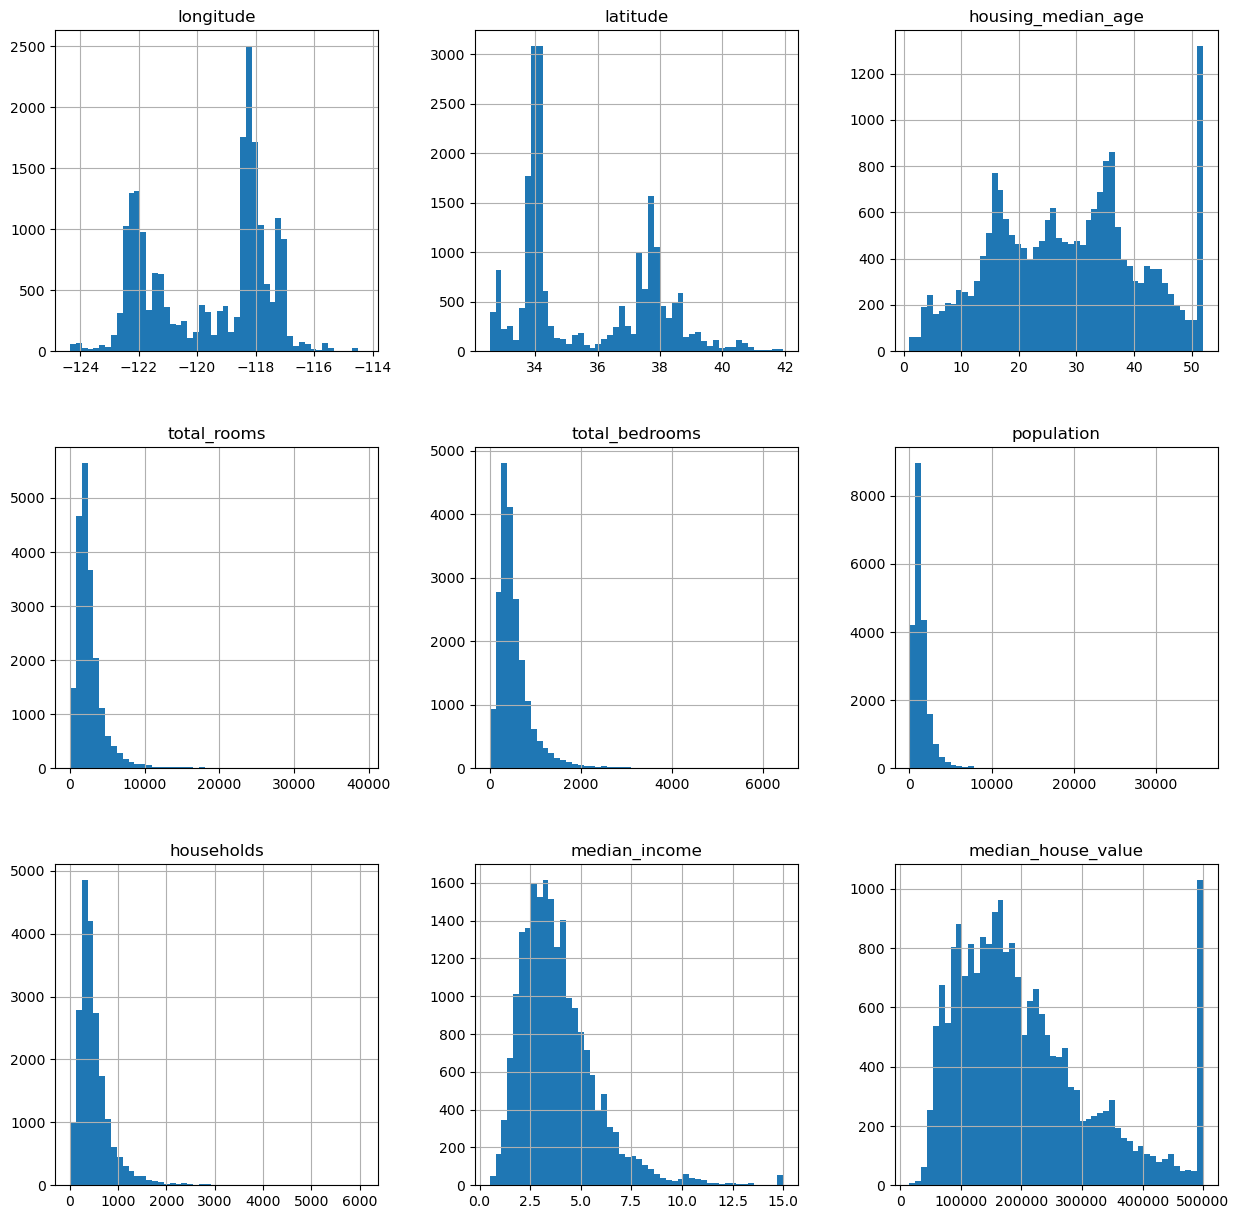

In [61]:
df.hist(bins=50,figsize=(15,15)) # Histogram is used to see the distribution of a numerical value
plt.show()                       # Here, show() method is used to display the graph of histogram

From the above plot, it is to be noted that the outliers are present for housing_median_age and median_house_value.
while total_rooms,total_bedrooms,population,households,median_income are of right skewed.
while latitude and longitude are asymmetric i.e., highly skewed.

### 2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

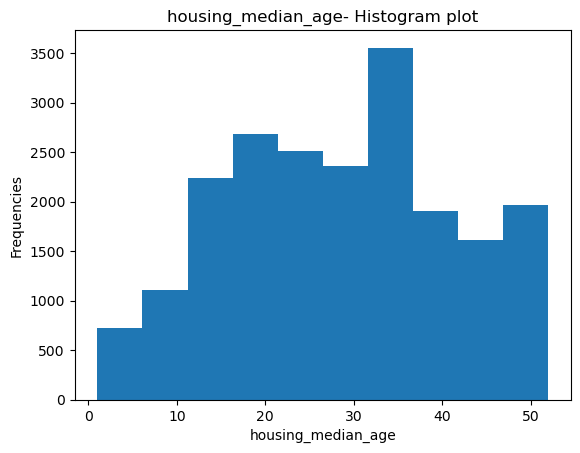

In [62]:
plt.hist(df["housing_median_age"])  #Histogram is used to see the distribution of a numerical value.
plt.title("housing_median_age- Histogram plot")    # x-axis=housing_median_age,y-axis=Frequencies
plt.xlabel("housing_median_age")
plt.ylabel("Frequencies")
plt.grid(False)         # Here, we use grid() method to display the gridlines 
plt.show()

From the above histogram plot we can come to the analysis that it is distributed symmetrically.


we can know the skewness of the above plot by using: 3*(mean - median)/std

In [63]:
df['housing_median_age'].mean() # calculating the mean of the housing_median_age varible

28.639486434108527

In [64]:
df['housing_median_age'].median() # calculating the median of the housing_median_age variable

29.0

In [65]:
df['housing_median_age'].std() # calculating the standard deviation of the housing_median_age variable

12.585557612111637

In [66]:
skewed = 3 * (28.63 - 29)/12.58 # calculating the skewness of the housing_median_age by taking the mean,median and 
print(skewed)                   # standard deviation values from the above

-0.0882352941176473


The skewness of the above plot is -0.08 which is in range of -0.5 to -0.1. From this it is to be considered that it is perfectly symmetrical.


Finally, from the visualization plot and the skewness it is to be noted that the housing_median_age is perfectly symmetrical.

### 3. Show with the help of visualization, how median_income and median_house_values are related ?

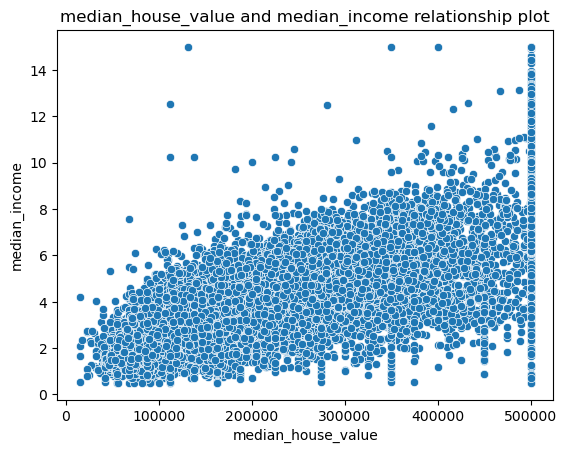

In [67]:
sns.scatterplot(x = "median_house_value",y = "median_income",data = df)# Scatter plot gives a relation between two numerical
plt.title("median_house_value and median_income relationship plot")    # values
plt.show()                                                             # x-axis = median_house_value and y-axis = median_income

From the above visualization it is to be analysed that with increase in median_house_value there is also increase in median_income.While, an outlier is present in the median_house_value. Therefore, median_house_value is directly proportional to median_income.

plot between median_income vs median_house_values is directly proportional to each other as it has positive correlation.

### 4. Create a dataset by deleting the corresponding examples from the data set for which total_bedrooms are not available?

In [68]:
df[df.isnull().any(axis=1)] # The isnull() returns a dataframe object where are values are returned with a boolean value True 
                            # for NULL values and False for Non null values. # axis = 1 means column
                            # Here NULL values are denoted by NaN values.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In the above code missing values are identified by the isnull() method. The missing values are identified in the column 'total_bedrooms' with value denoted by NaN.

In [69]:
new_data = df.dropna(subset = "total_bedrooms") # Here, dropna() method is used to analyse and drop rows/columns with null 
new_data                                        # values with different ways. 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In the above code, the missing values are dropped from the 'total_bedrooms' column by using dropna() method.

### 5. Create a data set by filling the missing data with mean_values of the total_bedrooms in the original data set.

In [70]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean()) # Here, we are filling the missing values in 
                                                                                # the original dataset in the column 
                                                                                # 'total_bedrooms' where null values are present
                                                                                #  by using fillna() method.    
x_mean = df['total_bedrooms'].mean()
print(f"The mean of the total_bedrooms is : {x_mean}") # Here, I want to show the mean of the variable 'total_bedrooms' which 
df                                                     # I used to replace the null values in the 'total_bedrooms'. 

The mean of the total_bedrooms is : 537.8705525375639


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In the above code, a new dataset has been created where the missing values in the 'total_bedrooms' which are denoted by NaN are replaced with the mean value of total_bedrooms.

For eg:row no.290,341,538, 563, 696 and other rows with the missing values are replaced with the mean value of 'total_bedrooms' i.e.,537.8705525375639,respectively.

### 6. Write a programming construct(create a user defined function) to calculate the median value of the data set whereever required?

In [71]:
df.head() #The head() returns the first 5 rows for the object based on position.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


Median() : Basically it is defined as the 50th percentile of the set of measurements, when observed measurements are ranked from smallest to highest. It is not sensitive to outliers. commonly used by Discrete and Continuous data.

A point to be noted that median() can be calculated for Discrete and Continuous data.

In [72]:
# Creating a user defined function for finding the median as mentioned in the above question
def median(data):             # Here, median function is created and it takes data set as input
    sorted_data = sorted(data) # Here, it sorts the given data set 
    data_len = len(sorted_data)  # Here, the length of the dataset is taken                            
    middle = (data_len - 1) // 2 # Here, it checks whether the dataset is odd/even in length
    if middle % 2 == 0:          # Here, If the dataset is odd in length, the function picks the mid-value and returns it.
        return sorted_data[middle]
    else:
        return (sorted_data[middle] + sorted_data[middle + 1]) / 2 # Here, if the dataset is even the function picks the two mid
                                                                   # values, calculates the average and returns the result.

In [73]:
long_median = median(df["longitude"]) # Here, median function() gives the 50th percentile of the variable "longitude" 
print(f"The median() value of the variable longitude is: {long_median}") # based on all observations in longitude.

The median() value of the variable longitude is: -118.49


In [74]:
lat_median = median(df["latitude"]) #Here, median function() gives the 50th percentile of the variable "latitude" based on all 
print(f"The median() value of the variable latitude is: {lat_median}") # observations in latitude.

The median() value of the variable latitude is: 34.26


In [75]:
house_median = median(df["housing_median_age"]) #Here, median function() gives the 50th percentile of the variable  
print(f"The median() value of the variable housing_median_age is: {house_median}") # "housing_median_age" based on all 
                                                                                   # observations in housing_median_age.

The median() value of the variable housing_median_age is: 29.0


In [76]:
rooms_median = median(df["total_rooms"]) #Here, median function() gives the 50th percentile of the variable  
print(f"The median() value of the variable total_rooms is: {rooms_median}") # "total_rooms" based on all 
                                                                                   # observations in total_rooms.

The median() value of the variable total_rooms is: 2127.0


In [77]:
bed_median = median(df["total_bedrooms"]) #Here, median function() gives the 50th percentile of the variable  
print(f"The median() value of the variable total_bedrooms is: {bed_median}") # "total_bedrooms" based on all 
                                                                                   # observations in total_bedrooms.

The median() value of the variable total_bedrooms is: 438.0


In [78]:
pop_median = median(df["population"]) #Here, median function() gives the 50th percentile of the variable  
print(f"The median() value of the variable population is: {pop_median}") # "population" based on all 
                                                                                   # observations in population.

The median() value of the variable population is: 1166.0


In [79]:
holds_median = median(df["households"]) # Here, median function() gives the 50th percentile of the variable  
print(f"The median() value of the variable households is: {holds_median}") # "households" based on all 
                                                                           # observations in households.

The median() value of the variable households is: 409.0


In [80]:
income_median = median(df["median_income"]) #Here, median function() gives the 50th percentile of the variable  
print(f"The median() value of the variable income_median is: {income_median}") # "median_income" based on all 
                                                                                   # observations in median_income.

The median() value of the variable income_median is: 3.5347999999999997


In [81]:
value_median = median(df["median_house_value"]) #Here, median function() gives the 50th percentile of the variable  
print(f"The median() value of the variable median_house_value is: {value_median}") # "median_house_value" based on all 
                                                                                   # observations in median_house_value.

The median() value of the variable median_house_value is: 179700.0


### 7. Plot latitude vs longitude and explain your observations.

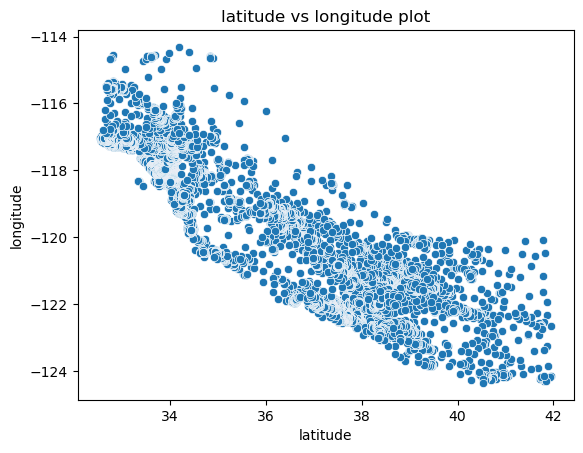

In [82]:
sns.scatterplot(x = 'latitude', y = 'longitude', data = df) # Here, I used the scatter plot present in seaborn library to find 
plt.title("latitude vs longitude plot")                  # the relationship between two varibles i.e., latitude and longitude
plt.show()                                                  # x-axis = "latitude" and y-axis = "longitude"

From the above plot,it is to be noted that with an decrease in longitude,latitude is increased.From this point of view,it is to be known that latitude and longitude are not dependent on each other.From this we can say that longitude is inversely proportional to latitude.

it is also be noted that latitude vs longitude has negative correlation as here y-axis is increasing while x-axis is decreasing,i.e., both are moving in an opposite direction.

### 8. Create a data set for which ocean_proximity is "Near ocean".

In [83]:
new_data = df.loc[df["ocean_proximity"] == "NEAR OCEAN"] # Here, loc is an label based method which is used to select rows and 
                                                         # columns by Names/Labels
                                                         # loc is an essential pandas method used for filtering, selecting and 
                                                         # manipulating the data
new_data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


From the above code we have created a new data set for the variable 'ocean_proximity' with the value 'NEAR OCEAN' which has 2658 rows and 10 columns.

### 9. Find the mean and median of the median_income for the data set created in question 8.

In [84]:
mean_income = new_data['median_income'].mean() # mean() function gives the average of the data
                                 # mean() is applicable for discrete and continuous data but not for categorical data
                                 # mean = sum of observations / number of observations
print(f"The mean of the median_income is: {mean_income}")

The mean of the median_income is: 4.005784800601957


In [85]:
median_income = new_data['median_income'].median() # median() function gives the 50th percentile of the set of all observations.
print(f"The median of the median_income is: {median_income}")

The median of the median_income is: 3.64705


From the above code, it is observed that the mean and median of the median_income is : 4.0057848 and 3.64705

### 10. Please create a new column total_bedroom_size . If the total_bedrooms is 10 or less, it should be quoted as small. If the total_bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [86]:
conditions = [
    (df['total_bedrooms']<=10), # Here, the condition with total_bedrooms size less than or equal to 10 is taken.
    (df['total_bedrooms']>=11) & (df['total_bedrooms']<1000), # The condition for no of bedrooms greater than or equal to 11 and
                                                              # also the no of bedrooms less than 1000 is taken.
    (df['total_bedrooms']>=1000)                              # Here, the condition for no of bedrooms greater than or equal to
]                                                             # 1000 is taken.
values = ['Small','Medium','Large']                           # Here, The values for the above conditions is mentioned.
df['total_bedroom_size'] = np.select(conditions,values)# Here, I created a new column with total_bedroom_size and with the help 
df                                                     # numerical python as np taken the function select which takes the 
                                                       # parameters as conditions and values.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,Medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,Large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,Medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,Medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,Medium
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,Medium
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,Medium
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,Medium
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,Medium


In the above dataset, a new column total_bedroom_size has been added. Where total_bedroom_size has been compared to the number of total_bedrooms while mentioning about the sizes of total_bedroom_size, where:

if total_bedroom_size <=10 it is indicated as "Small", if the total_bedroom_size >=11 and total_bedroom_size < 1000 it is indicated as "Medium", if the total_bedroom_size >=1000 it is indicated as "Large".

# CONCLUSION : 

1.From the given dataset it is to be noted that the outliers are present for housing_median_age and median_house_value.

2.All the features present in this dataset are of float and integer data type except ocean_proximity which is of object datatype.

3.housing_median_age is of fairly symmetric as the skewness value (-0.5 to -0.1).

4.plot between median_income vs median_house_values is directly proportional to each other as it has positive correlation.

5.plot between latitude and longitude is inversely proportional to each other as within increase in latitude,there is decrease in longitude.Therefore ,it has a negative correlation.